In [1]:
import  tflite_runtime.interpreter as tflite
import numpy as np
import joblib
import matplotlib.pyplot as plt

from skimage import io
from skimage.transform import resize
from skimage import exposure

In [2]:
tflite_model = joblib.load("./picklefiles/tflite_model")
interpreter = tflite.Interpreter(model_content=tflite_model)

In [3]:
input_details = interpreter.get_input_details()
# input_details

In [4]:
output_details = interpreter.get_output_details()
# output_details

In [5]:
def pass1( img, IMG_HEIGHT, IMG_WIDTH, as_gray=True):
    fit_op =True
    # img = io.imread(img_path, as_gray=as_gray)
    # msk = io.imread(mask_path, as_gray=as_gray)
    img = img
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH))
    # msk = resize(msk, (IMG_HEIGHT, IMG_WIDTH))



    # msk = np.where(msk>0.5,1,0)

    img = img
    # msk = msk

    # IMG,MSK =  img, msk
    IMG = img
    # print(IMG.shape, MSK.shape)
    if not fit_op:
        return IMG
    else:
        return IMG.reshape(IMG_HEIGHT, IMG_WIDTH, 1)

def histogram_equalization(img):
    fit_op =True
    
    img = exposure.equalize_hist(img)


    # img = exposure.equalize_adapthist(img, clip_limit=0.03) <<<< does NOT work
    # contrast limited adaptive hist equalization
    # clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))
    # img = clahe.apply(img)



    IMG =  img
    if not fit_op:
        return IMG
    else:
        return IMG.reshape(256, 256, 1)

In [6]:
img = io.imread("../temp/images/16598.jpg", as_gray=True)

io.imshow(img)

img_pass = histogram_equalization(pass1(img,256,256))
io.imshow(np.squeeze(img_pass))

/home/s/anaconda3/envs/ml/lib/python3.7/site-packages/skimage/exposure/exposure.py:124: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


/home/s/anaconda3/envs/ml/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


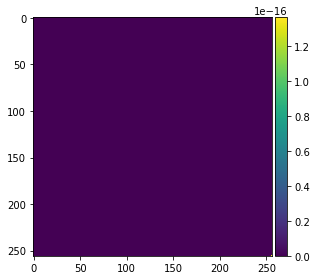

In [7]:
img_pass = img_pass.reshape((1,256,256,1))
img_pass = np.array(img_pass, dtype=np.float32)

interpreter.allocate_tensors()
interpreter.invoke()

interpreter.set_tensor(input_details[0]['index'], img_pass)
tflite_results = interpreter.get_tensor(output_details[0]['index'])

io.imshow(np.squeeze(tflite_results))